In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import codecs 
codecs.register_error("strict",codecs.ignore_errors)
import missingno as msno
import plotly.graph_objects as go 
import plotly.express as px 
import plotly.subplots as make_subplots
from sklearn.decomposition import PCA
%matplotlib inline 

In [3]:
from docx import Document

def read_table_to_dataframe(file_path, table_index=0):
    doc = Document(file_path)
    
    # Get the specified table
    table = doc.tables[table_index]

    # Extract data from the table
    data = []
    for row in table.rows:
        row_data = [cell.text for cell in row.cells]
        data.append(row_data)

    # Create a Pandas DataFrame
    df = pd.DataFrame(data[1:], columns=data[0])  # Assuming the first row is the header

    return df

# Replace 'your_file.docx' with the actual path to your DOCX file
file_path = r"C:\Users\Administrator\Desktop\igboji files\0.1.docx"
df = read_table_to_dataframe(file_path)

# Display the DataFrame
df.head(50)


,Location,Long,Lat,Pb,Zn,Mn,Fe,Al,Cr,Ni,Co,Cu
0,1,7.488889,5.928778,344,148,1601,46200,15200,22,14,21,12
1,2,7.490778,5.929306,292,92,1125,38700,9600,14,7,14,6
2,3,7.494944,5.929361,7906,1570,9457,151600,19700,43,21,50,25
3,4,7.501139,5.917972,2995,1053,2217,80800,11100,25,41,47,37
4,6,7.503759,5.922339,9,13,70,21000,9900,16,15,16,9
5,7,7.503759,5.939024,9,44,233,55000,10050,19,13,20,9
6,8,7.504653,5.989018,1565,960,1000,61000,18700,24,18,10,13
7,9,7.510889,5.988750,7,5,286,2800,2200,7,1,2,2
8,10,7.520415,5.972349,1350,1450,2100,78000,17600,47,13,40,13
9,11,7.520422,5.922348,16,60,230,23500,10100,18,20,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  46 non-null     object
 1   Long      46 non-null     object
 2   Lat       46 non-null     object
 3   Pb        46 non-null     object
 4   Zn        46 non-null     object
 5   Mn        46 non-null     object
 6   Fe        46 non-null     object
 7   Al        46 non-null     object
 8   Cr        46 non-null     object
 9   Ni        46 non-null     object
 10  Co        46 non-null     object
 11  Cu        46 non-null     object
dtypes: object(12)
memory usage: 4.4+ KB


In [5]:
df.columns

Index(['Location', 'Long', 'Lat', 'Pb', 'Zn', 'Mn', 'Fe', 'Al', 'Cr', 'Ni',
       'Co', 'Cu'],
      dtype='object')

In [6]:
# Convert columns to float using a loop
import pandas as pd

# Assuming 'df' is your DataFrame

# Specify the columns you want to convert to integers
columns_to_convert = [ 'Pb', 'Zn', 'Mn', 'Fe', 'Al', 'Cr', 'Ni',
       'Co', 'Cu'],  # Add your desired column names

# Loop through the specified columns and convert values to integers
for column in columns_to_convert:
    df[column] = df[column].astype(int)

# Display the updated DataFrame
print(df.head())


  Location      Long       Lat    Pb    Zn    Mn      Fe     Al  Cr  Ni  Co  \
0        1  7.488889  5.928778   344   148  1601   46200  15200  22  14  21   
1        2  7.490778  5.929306   292    92  1125   38700   9600  14   7  14   
2        3  7.494944  5.929361  7906  1570  9457  151600  19700  43  21  50   
3        4  7.501139  5.917972  2995  1053  2217   80800  11100  25  41  47   
4        6  7.503759  5.922339     9    13    70   21000   9900  16  15  16   

   Cu  
0  12  
1   6  
2  25  
3  37  
4   9  


In [7]:
# Convert columns to float using a loop
import pandas as pd

# Assuming 'df' is your DataFrame

# Specify the columns you want to convert to integers
columns_to_convert = [ 'Long', 'Lat',],  # Add your desired column names

# Loop through the specified columns and convert values to integers
for column in columns_to_convert:
    df[column] = df[column].astype(float)

# Display the updated DataFrame
print(df.head())


  Location      Long       Lat    Pb    Zn    Mn      Fe     Al  Cr  Ni  Co  \
0        1  7.488889  5.928778   344   148  1601   46200  15200  22  14  21   
1        2  7.490778  5.929306   292    92  1125   38700   9600  14   7  14   
2        3  7.494944  5.929361  7906  1570  9457  151600  19700  43  21  50   
3        4  7.501139  5.917972  2995  1053  2217   80800  11100  25  41  47   
4        6  7.503759  5.922339     9    13    70   21000   9900  16  15  16   

   Cu  
0  12  
1   6  
2  25  
3  37  
4   9  


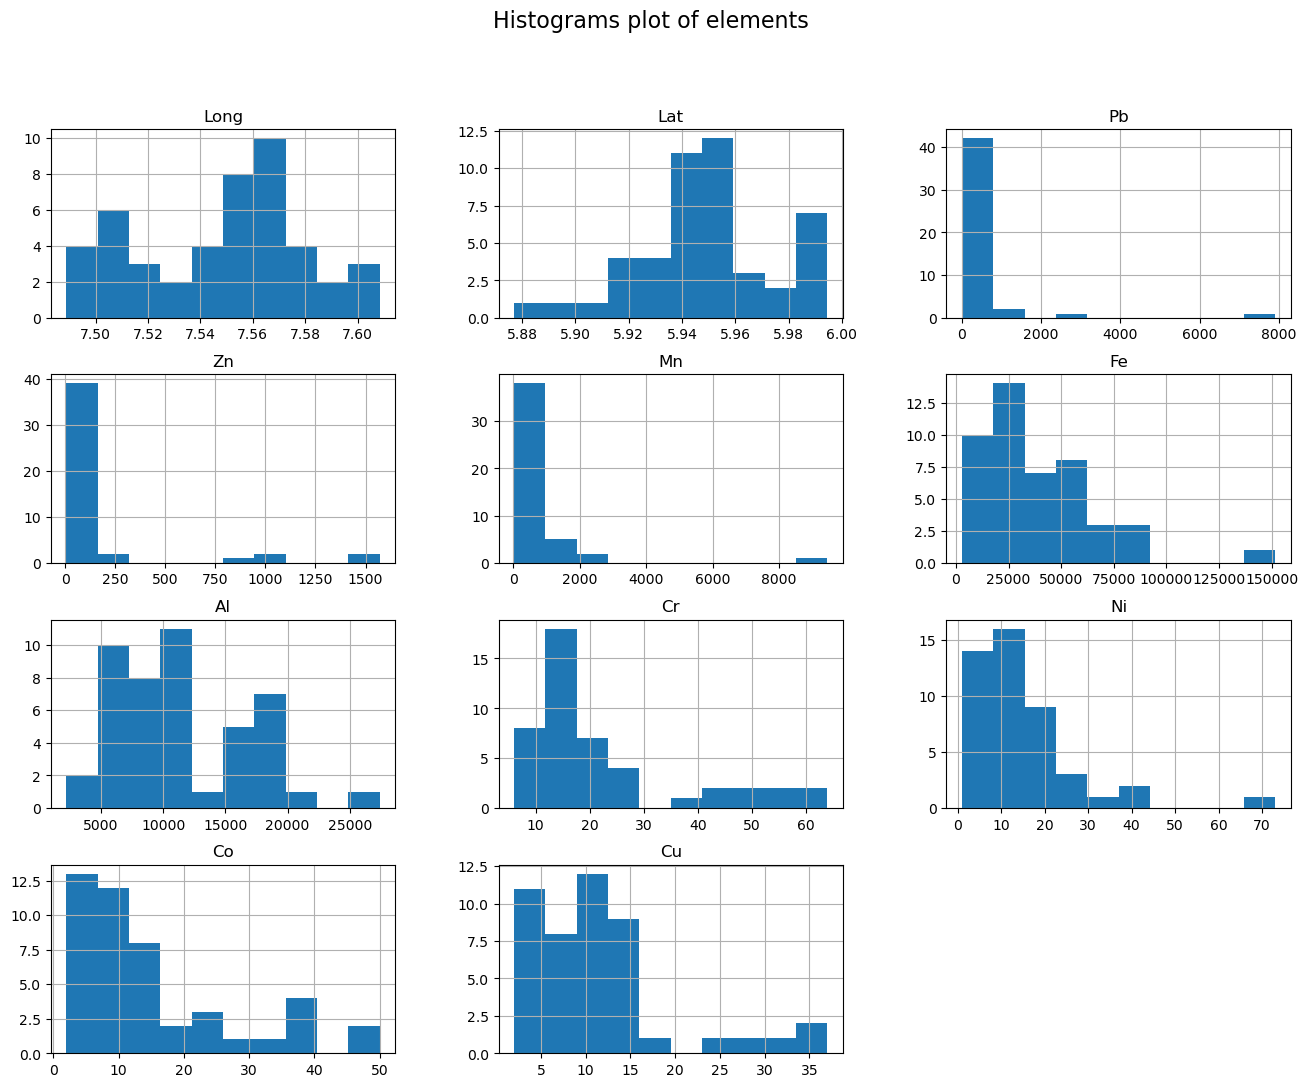

In [8]:
df.hist(figsize=(16, 12))
plt.suptitle('Histograms plot of elements', fontsize=16)
plt.show()


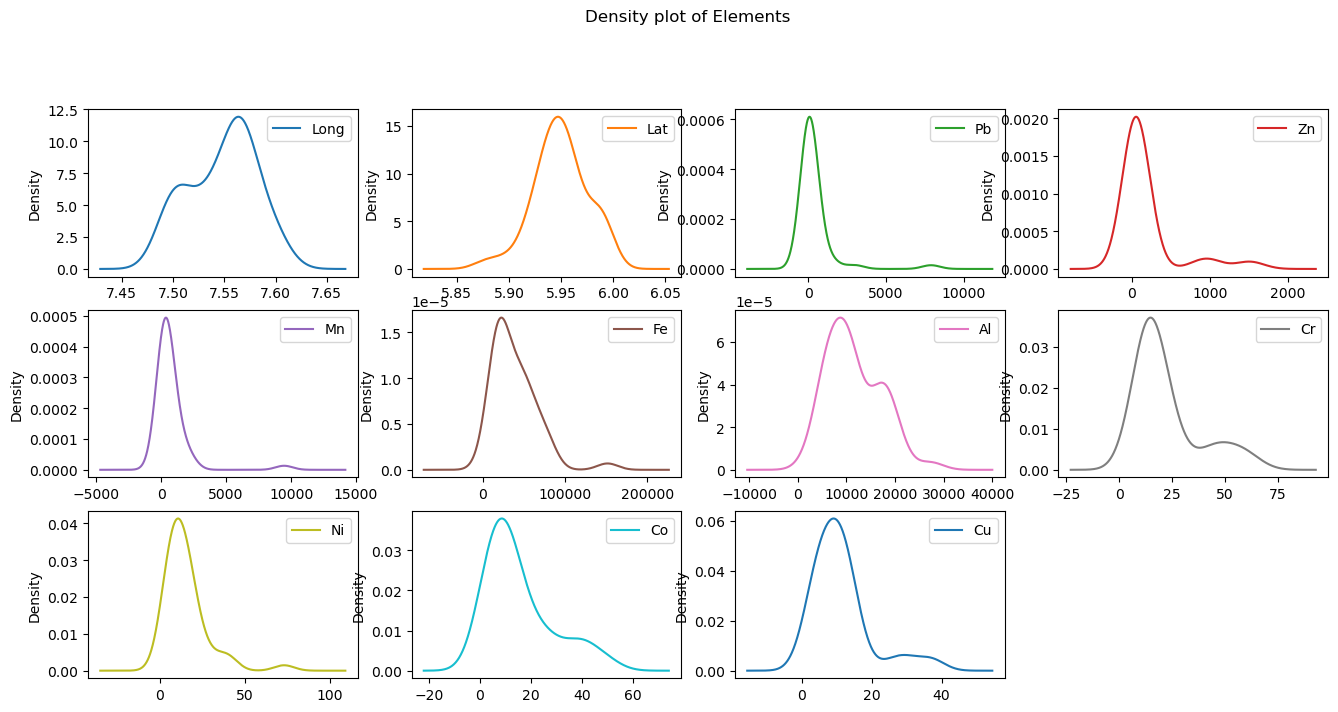

In [9]:
df.plot(kind='density',figsize=(16,10), subplots=True, layout=(4,4), sharex=False)
plt.suptitle("Density plot of Elements")
plt.show()

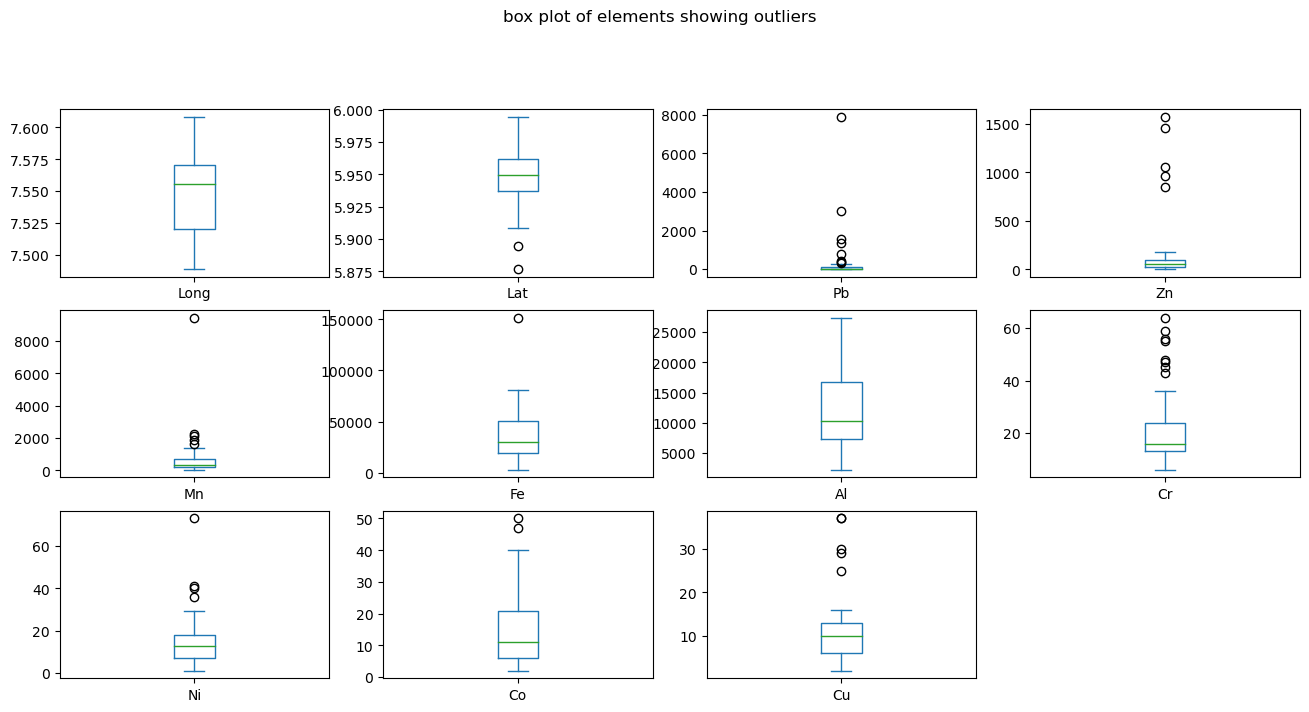

In [10]:
df.plot(kind='box', figsize=(16,10),subplots=True, layout=(4,4), sharex=False)
plt.suptitle("box plot of elements showing outliers")
plt.show()

In [11]:
df.describe()

,Long,Lat,Pb,Zn,Mn,Fe,Al,Cr,Ni,Co,Cu
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,7.548028,5.949288,372.717391,180.760870,721.804348,38407.608696,11555.217391,22.130435,15.130435,15.391304,11.282609
std,0.032344,0.025441,1252.016448,366.479782,1422.486440,26909.333299,5504.542261,15.230975,12.688768,12.976009,8.239911
min,7.488889,5.876972,5.000000,5.000000,24.000000,2800.000000,2200.000000,6.000000,1.000000,2.000000,2.000000
25%,7.520423,5.937528,12.250000,27.500000,210.250000,19500.000000,7250.000000,13.000000,7.000000,6.000000,6.000000
50%,7.555572,5.949305,20.000000,57.500000,308.000000,29700.000000,10250.000000,16.000000,12.500000,11.000000,10.000000
75%,7.570204,5.962257,116.250000,100.750000,680.000000,50400.000000,16700.000000,24.000000,18.000000,20.750000,13.000000
max,7.608306,5.994528,7906.000000,1570.000000,9457.000000,151600.000000,27400.000000,64.000000,73.000000,50.000000,37.000000


In [12]:
# Function to remove outliers from a column
"""def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Loop through each column and remove outliers
for col in df.columns:
    df[col] = remove_outliers(df[col])

# Display the DataFrame without outliers
df = df"""


'def remove_outliers(column):\n    q1 = column.quantile(0.25)\n    q3 = column.quantile(0.75)\n    iqr = q3 - q1\n    lower_bound = q1 - 1.5 * iqr\n    upper_bound = q3 + 1.5 * iqr\n    return column[(column >= lower_bound) & (column <= upper_bound)]\n\n# Loop through each column and remove outliers\nfor col in df.columns:\n    df[col] = remove_outliers(df[col])\n\n# Display the DataFrame without outliers\ndf = df'

In [13]:
df.columns.isnull().sum()

0

In [14]:
"""df.plot(kind='box', figsize=(16,10),subplots=True, layout=(4,4), sharex=False)
plt.suptitle("Box plots showing normalized data")
plt.show()"""

'df.plot(kind=\'box\', figsize=(16,10),subplots=True, layout=(4,4), sharex=False)\nplt.suptitle("Box plots showing normalized data")\nplt.show()'

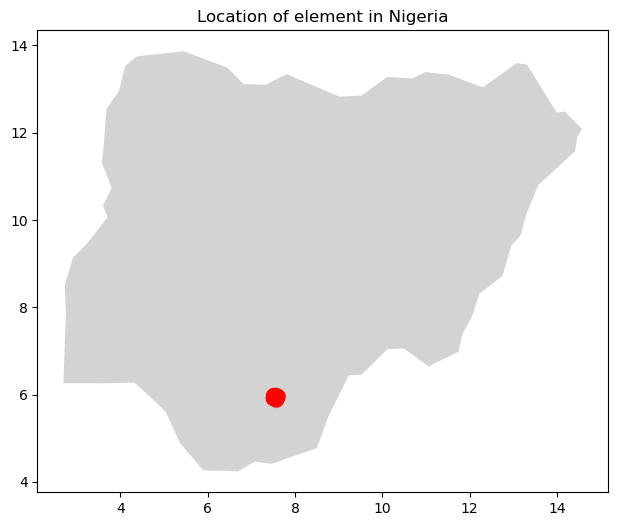

In [15]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Assuming df contains 'Long' and 'Lat' columns
geometry = [Point(lon, lat) for lon, lat in zip(df['Long'], df['Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Load a GeoDataFrame for Nigeria
nigeria = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
nigeria = nigeria[nigeria['name'] == 'Nigeria']

# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
nigeria.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, color='red', marker='o', markersize=100, alpha=0.5, legend=True)
plt.title("Location of element in Nigeria")
# Display the map
plt.show()



In [16]:
df_corr = df.corr()
df_corr

,Location,Long,Lat,Pb,Zn,Mn,Fe,Al,Cr,Ni,Co,Cu
Location,1.000000,0.582538,-0.006082,-0.375220,-0.444510,-0.294086,-0.195892,-0.015003,0.022559,-0.205540,-0.205909,-0.189620
Long,0.582538,1.000000,-0.057729,-0.380373,-0.421907,-0.337866,-0.236247,-0.087408,0.035796,-0.127797,-0.229353,-0.188029
Lat,-0.006082,-0.057729,1.000000,-0.145391,-0.015114,-0.246051,-0.287288,-0.251942,-0.260488,-0.214767,-0.454654,-0.223175
Pb,-0.375220,-0.380373,-0.145391,1.000000,0.816343,0.951598,0.751337,0.297367,0.284768,0.195726,0.567429,0.437294
Zn,-0.444510,-0.421907,-0.015114,0.816343,1.000000,0.725717,0.701442,0.409001,0.385995,0.286882,0.602487,0.509739
Mn,-0.294086,-0.337866,-0.246051,0.951598,0.725717,1.000000,0.814291,0.404831,0.403845,0.181238,0.656316,0.418062
Fe,-0.195892,-0.236247,-0.287288,0.751337,0.701442,0.814291,1.000000,0.745206,0.737545,0.419887,0.874451,0.691691
Al,-0.015003,-0.087408,-0.251942,0.297367,0.409001,0.404831,0.745206,1.000000,0.804285,0.663578,0.753747,0.767126
Cr,0.022559,0.035796,-0.260488,0.284768,0.385995,0.403845,0.737545,0.804285,1.000000,0.580928,0.763087,0.716820
Ni,-0.205540,-0.127797,-0.214767,0.195726,0.286882,0.181238,0.419887,0.663578,0.580928,1.000000,0.556556,0.834719


<Axes: >

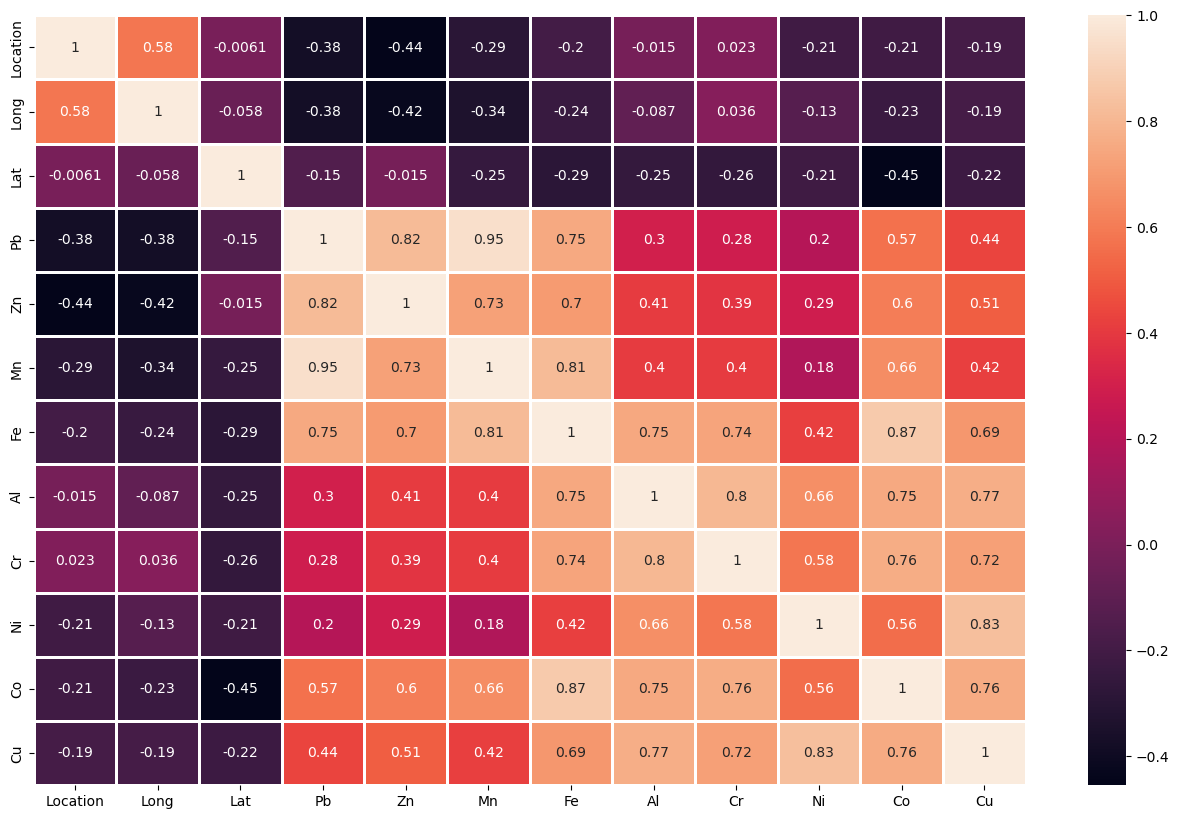

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True,linewidths=1)

In [18]:
data_drop = df.drop(columns=['Location', 'Long', 'Lat',],axis=1,inplace=True)
data_drop = df

In [19]:
df.columns

Index(['Pb', 'Zn', 'Mn', 'Fe', 'Al', 'Cr', 'Ni', 'Co', 'Cu'], dtype='object')

In [20]:
# Create a pair plot with linear regression lines
"""sns.pairplot(df, kind='reg', height=2.5)

# Show the plot
plt.show()""""update descrptive stats"


"sns.pairplot(df, kind='reg', height=2.5)\n\n# Show the plot\nplt.show()update descrptive stats"

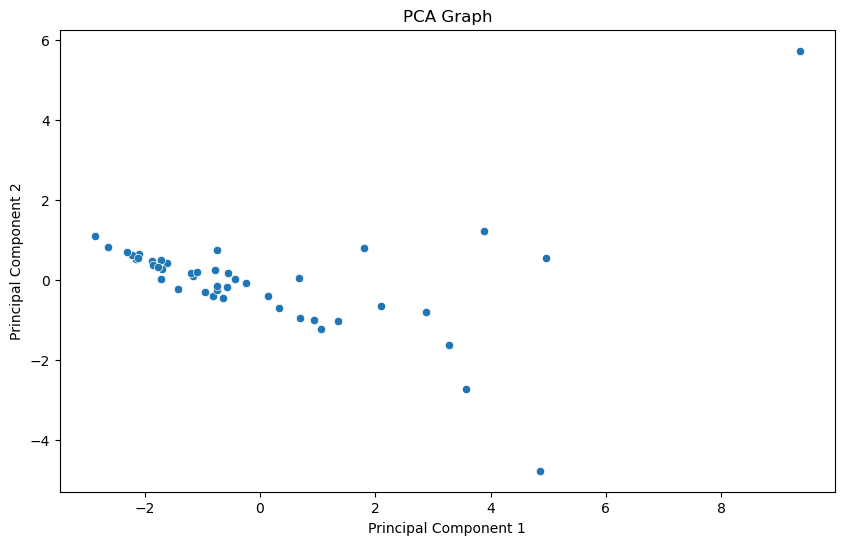

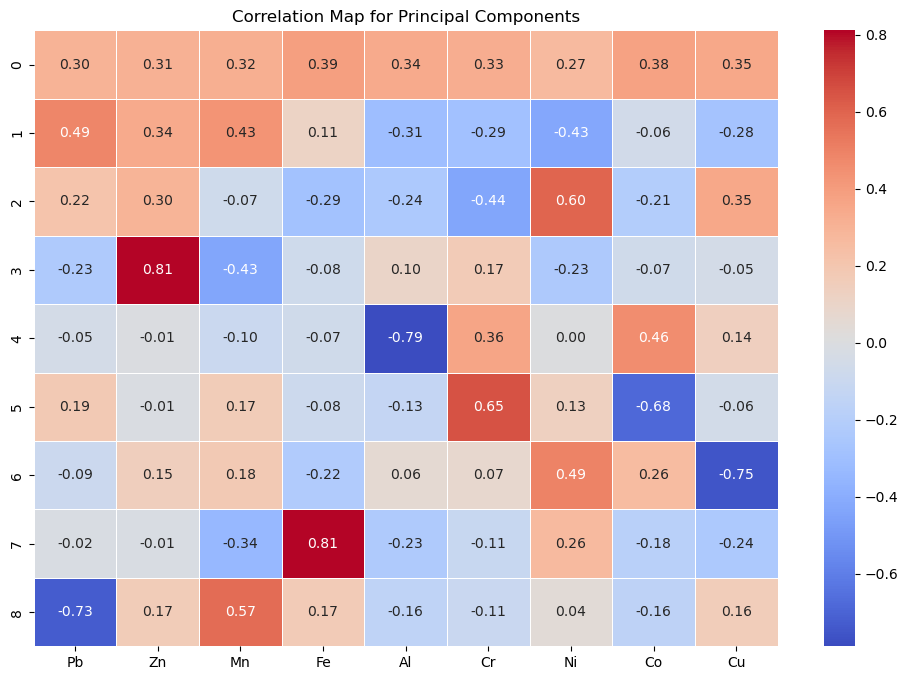

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Assuming df is your DataFrame with numerical columns
# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_filled)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(df_standardized)

# Create a DataFrame with principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(df_filled.shape[1])])

# Plotting PCA graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pc_df)
plt.title('PCA Graph')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plotting Correlation Map
correlation_matrix = pd.DataFrame(data=pca.components_, columns=df_filled.columns)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Map for Principal Components')
plt.show()


In [22]:
# Create a pair plot with linear regression lines
"""sns.pairplot(pc_df, kind='reg', height=2.5)
plt.suptitle("Linear relationship of Elements")
# Show the plot
plt.show()"""


'sns.pairplot(pc_df, kind=\'reg\', height=2.5)\nplt.suptitle("Linear relationship of Elements")\n# Show the plot\nplt.show()'

In [23]:
import pandas as pd
from scipy.stats import kurtosis, skew, sem, mode
from docx import Document
from io import BytesIO
import base64
from IPython.display import display, HTML

# Assuming 'df' is your DataFrame with multiple columns
# df = pd.DataFrame(...)  # Replace ... with your actual data

# Fill NaN values with a placeholder (e.g., 0) or any other strategy
df_filled = df.fillna(df.mean())

# Calculate statistics for each column
statistics_df = pd.DataFrame({
    'Kurtosis': df_filled.apply(kurtosis),
    'Skewness': df_filled.apply(skew),
    'Sample Variance': df_filled.var(),
    'Maximum': df_filled.max(),
    'Minimum': df_filled.min(),
    'Standard Deviation': df_filled.std(),
    'Mean': df_filled.mean(),
    'Median': df_filled.median(),
    'Mode': df_filled.mode().iloc[0],  # Take the first mode if multiple
    'Coefficient of Variation': df_filled.std() / df_filled.mean()
})

# Create a new Word document
doc = Document()

# Add a heading
doc.add_heading('Descriptive Statistics', level=1)

# Add a table to the document
table = doc.add_table(rows=1, cols=11)
table.style = 'TableGrid'

# Add column names to the table
columns = table.rows[0].cells
columns[0].text = 'Statistic'
for i, col_name in enumerate(statistics_df.columns, start=1):
    columns[i].text = col_name

# Add data to the table
for index, row in statistics_df.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = index
    for i, value in enumerate(row, start=1):
        row_cells[i].text = str(round(value, 2))

# Save the document to a BytesIO object
buffer = BytesIO()
doc.save(buffer)
buffer.seek(0)

# Encode the content using base64
base64_content = base64.b64encode(buffer.read()).decode('utf-8')

# Display a link for downloading the file
display(HTML(f'<a href="data:application/vnd.openxmlformats-officedocument.wordprocessingml.document;base64,{base64_content}">Download descriptive_statistics.docx</a>'))


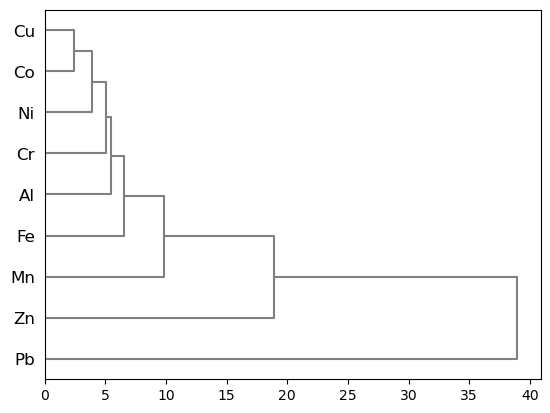

In [24]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming df is your DataFrame with numerical columns
# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Standardize the data
hscaler = StandardScaler()
df_standardized = scaler.fit_transform(df_filled)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(df_standardized)

# Create a DataFrame with principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(df_filled.shape[1])])

# Calculate the distance matrix for hierarchical clustering
dist_matrix = pd.DataFrame(squareform(pdist(pc_df.T, metric='euclidean')), columns=pc_df.columns, index=pc_df.columns)

# Perform hierarchical clustering to obtain linkage matrix
linkage_matrix = linkage(dist_matrix.values, method='average')

# Create a dendrogram plot using Plotly
fig = go.Figure()

dendrogram_data = dendrogram(linkage_matrix, orientation='right', color_threshold=0, above_threshold_color='gray', labels=df_filled.columns)

for i, color in zip(dendrogram_data['icoord'], dendrogram_data['color_list']):
    fig.add_shape(type='line', x0=i[0], y0=i[1], x1=i[2], y1=i[3], line=dict(color=color))

fig.update_layout(
    title='Hierarchical Clustering Dendrogram',
    xaxis_title='Distance',
    yaxis_title='Features',
    showlegend=False
)

# Add a heatmap for the distance matrix
fig.add_trace(go.Heatmap(z=dist_matrix.values,
                        x=df_filled.columns,
                        y=df_filled.columns,
                        colorscale='viridis',
                        colorbar=dict(title='Distance')))

# Show the plot
fig.show()



In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from docx import Document
from io import BytesIO
import base64
from IPython.display import display, HTML

# Assuming 'df' is your DataFrame with numerical columns
df = df.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_filled)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(df_standardized)

# Create a DataFrame with original column names and principal components
pc_df = pd.DataFrame(data=principal_components, columns=df.columns)

# Save the principal components table to a Word document
doc = Document()
doc.add_heading('PCA Principal Components', level=1)

# Add a table to the document
table = doc.add_table(rows=pc_df.shape[0] + 1, cols=pc_df.shape[1] + 1)
table.style = 'TableGrid'

# Add column names to the table
table.cell(0, 0).text = ''
for col_name in pc_df.columns:
    table.cell(0, pc_df.columns.get_loc(col_name) + 1).text = col_name

# Add data to the table
for row_index, (index, row) in enumerate(pc_df.iterrows(), 1):
    table.cell(row_index, 0).text = str(index)
    for col_index, value in enumerate(row, 1):
        table.cell(row_index, col_index).text = f'{value:.4f}'

# Save the document to a BytesIO object
buffer = BytesIO()
doc.save(buffer)
buffer.seek(0)

# Encode the content using base64
base64_content = base64.b64encode(buffer.read()).decode('utf-8')

# Display a link for downloading the file
display(HTML(f'<a href="data:application/vnd.openxmlformats-officedocument.wordprocessingml.document;base64,{base64_content}">Download pca_principal_components.docx</a>'))


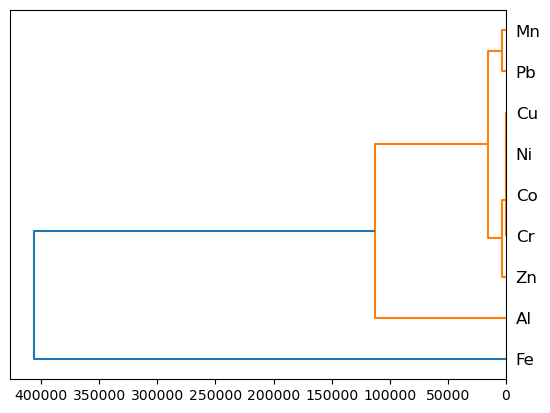

In [26]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame with numerical columns
# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Perform hierarchical clustering
linkage_matrix = linkage(df_filled.T, method='ward')

# Plot the dendrogram using plotly
fig = go.Figure()

dendro = dendrogram(linkage_matrix, orientation='left', labels=df_filled.columns)

# Create a scatter plot for the distances
fig.add_trace(go.Scatter(
    x=dendro['dcoord'],
    y=dendro['icoord'],
    mode='lines',
    name='Distance',
    line=dict(color='red')
))

fig.update_layout(
    xaxis_title='Distance',
    yaxis_title='Features',
    title='Hierarchical Clustering Dendrogram (Ward Linkage)',
    legend=dict(x=0.02, y=0.95),
    width=800,
    height=500,
)

fig.show()


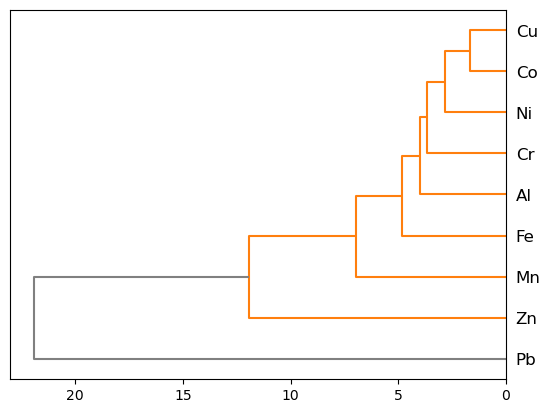

In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame with numerical columns
# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_filled)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(df_standardized)

# Create a DataFrame with principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(df_filled.shape[1])])

# Perform hierarchical clustering on PCA components
linkage_matrix = linkage(pc_df.T, method='ward')

# Plot the dendrogram using plotly with distances
fig = go.Figure()

# Add the dendrogram trace with distances
dendro = dendrogram(linkage_matrix, orientation='left', labels=df_filled.columns, above_threshold_color='gray')

# Update layout
fig.update_layout(
    xaxis_title='Distance',
    yaxis_title='Features',
    title='Hierarchical Clustering Dendrogram (Ward Linkage) for PCA Analysis',
    width=800,
    height=500,
)

fig.show()


In [28]:
import pandas as pd
from sklearn.decomposition import PCA
from docx import Document
from io import BytesIO
from IPython.display import display, HTML

# Assuming 'df' is your DataFrame with numerical columns

# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Standardize the data
pca_scaler = PCA()
df_standardized = pca_scaler.fit_transform(df_filled)

# Get the eigenvalues from the explained_variance_ attribute
eigenvalues = pca_scaler.explained_variance_

# Create a DataFrame with the eigenvalues and original column names
eigenvalues_df = pd.DataFrame({'Eigenvalue': eigenvalues}, index=df_filled.columns)

# Save the eigenvalues table to a Word document
doc = Document()
doc.add_heading('PCA Eigenvalues', level=1)

# Add a table to the document
table = doc.add_table(rows=1, cols=2)
table.style = 'TableGrid'

# Add column names to the table
columns = table.rows[0].cells
columns[0].text = 'Attribute'
columns[1].text = 'Eigenvalue'

# Add data to the table
for row in eigenvalues_df.itertuples():
    rows = table.add_row().cells
    rows[0].text = row.Index
    rows[1].text = str(round(row.Eigenvalue, 4))

# Save the document to a BytesIO object
buffer = BytesIO()
doc.save(buffer)
buffer.seek(0)

# Encode the content using base64
base64_content = base64.b64encode(buffer.read()).decode('utf-8')

# Display a link for downloading the file
display(HTML(f'<a href="data:application/vnd.openxmlformats-officedocument.wordprocessingml.document;base64,{base64_content}">Download pca_eigenvalues.docx</a>'))


In [29]:
import pandas as pd
from sklearn.decomposition import PCA
from docx import Document
from io import BytesIO
from IPython.display import display, HTML
from scipy.stats import skew, sem
import base64

# Assuming 'df' is your DataFrame with numerical columns

# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Standardize the data
scaler = PCA()
df_standardized = scaler.fit_transform(df_filled)

# Get the eigenvalues from the explained_variance_ attribute
eigenvalues = scaler.explained_variance_

# Calculate correlation, skewness, std_err, std, CV for each column
correlation_values = df_filled.corr()
skewness_values = df_filled.apply(skew)
std_err_values = df_filled.apply(sem)
std_values = df_filled.std()
cv_values = std_values / df_filled.mean()

# Create a DataFrame with the eigenvalues, original column names, and additional statistics
eigenvalues_df = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Skewness': skewness_values,
    'Std_err': std_err_values,
    'Std': std_values,
    'CV': cv_values
})

# Save the statistics table to a Word document
doc = Document()
doc.add_heading('PCA Analysis Statistics', level=1)

# Add a table to the document
table = doc.add_table(rows=1, cols=6)
table.style = 'TableGrid'

# Add column names to the table
columns = table.rows[0].cells
columns[0].text = 'Attribute'
columns[1].text = 'Eigenvalue'
columns[2].text = 'Skewness'
columns[3].text = 'Std_err'
columns[4].text = 'Std'
columns[5].text = 'CV'

# Add data to the table
for row in eigenvalues_df.itertuples():
    rows = table.add_row().cells
    rows[0].text = row.Index
    rows[1].text = str(round(row.Eigenvalue, 4))
    rows[2].text = str(round(row.Skewness, 4))
    rows[3].text = str(round(row.Std_err, 4))
    rows[4].text = str(round(row.Std, 4))
    rows[5].text = str(round(row.CV, 4))

# Save the document to a BytesIO object
buffer = BytesIO()
doc.save(buffer)
buffer.seek(0)

# Encode the content using base64
base64_content = base64.b64encode(buffer.read()).decode('utf-8')

# Display a link for downloading the file
display(HTML(f'<a href="data:application/vnd.openxmlformats-officedocument.wordprocessingml.document;base64,{base64_content}">Download pca_analysis_statistics.docx</a>'))


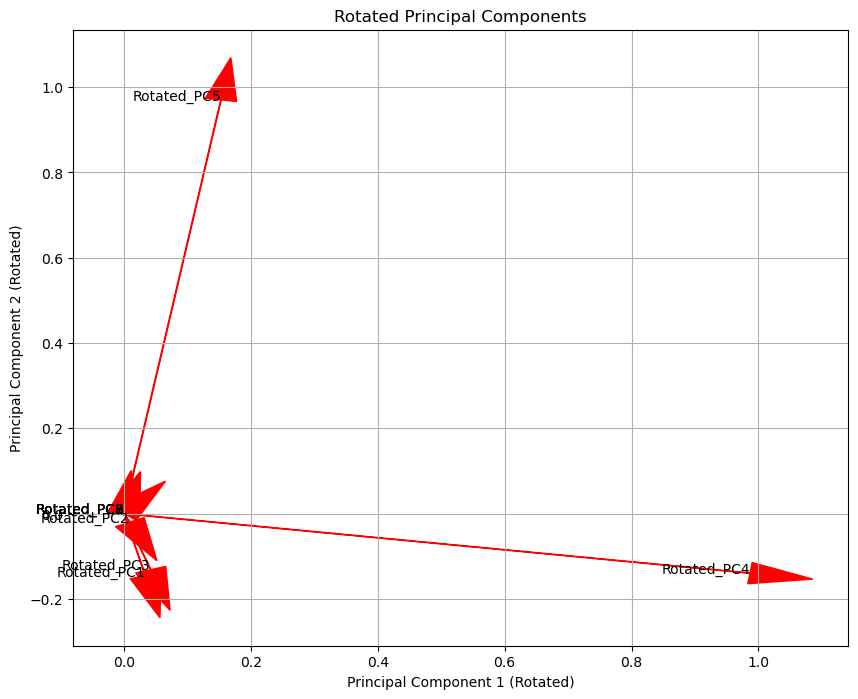

In [30]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame with numerical columns
# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Standardize the data
scaler = PCA()
df_standardized = scaler.fit_transform(df_filled)

# Access the principal components after rotation
rotated_components = scaler.components_

# Create a DataFrame with rotated principal components
rotated_pc_df = pd.DataFrame(data=rotated_components.T, columns=[f'Rotated_PC{i+1}' for i in range(rotated_components.shape[0])])

# Visualize the rotated principal components
plt.figure(figsize=(10, 8))
for i, col in enumerate(rotated_pc_df.columns):
    plt.arrow(0, 0, rotated_components[0, i], rotated_components[1, i], head_width=0.05, head_length=0.1, fc='r', ec='r')
    plt.text(rotated_components[0, i], rotated_components[1, i], col, fontsize=10, ha='right')

plt.title('Rotated Principal Components')
plt.xlabel('Principal Component 1 (Rotated)')
plt.ylabel('Principal Component 2 (Rotated)')
plt.grid(True)
plt.show()


In [32]:
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from docx import Document
from io import BytesIO
import base64
from IPython.display import display, HTML
from itertools import combinations

# Assuming 'df' is your DataFrame with numerical columns
# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())
# Standardize the data
scaler = PCA()
df_standardized = scaler.fit_transform(df_filled)

# Set a correlation threshold
#def threshold(value):
 #   if value == 0.3 or 0.3 
correlation_threshold  = 0.3 # You can adjust this threshold

# Create lists to store correlated and non-correlated features
correlated_features = []
non_correlated_features = []

# Loop through pairs of features
for feature_pair in combinations(df_filled.columns, 2):
    correlation_coefficient, p_value = pearsonr(df_filled[feature_pair[0]], df_filled[feature_pair[1]])

    # Check significance based on p-value
    if np.abs(correlation_coefficient) >= correlation_threshold and p_value < 0.05:
        correlated_features.append(feature_pair)
    else:
        non_correlated_features.append(feature_pair)

# Make sure both lists have the same length
min_length = min(len(correlated_features), len(non_correlated_features))
correlated_features = correlated_features[:min_length]
non_correlated_features = non_correlated_features[:min_length]

# Create a pandas DataFrame
result_df = pd.DataFrame({'Correlated Features': correlated_features, 'Non-correlated Features': non_correlated_features})

# Save the DataFrame to a Word document
doc = Document()
doc.add_heading('Correlation Analysis Results', level=1)

# Add a table to the document
table = doc.add_table(rows=1, cols=2)
table.style = 'TableGrid'

# Add column names to the table
columns = table.rows[0].cells
columns[0].text = 'Correlated Features'
columns[1].text = 'Non-correlated Features'

# Add data to the table
for row in result_df.itertuples():
    rows = table.add_row().cells
    rows[0].text = str(row._1)
    rows[1].text = str(row._2)

# Save the document to a BytesIO object
buffer = BytesIO()
doc.save(buffer)
buffer.seek(0)

# Encode the content using base64
base64_content = base64.b64encode(buffer.read()).decode('utf-8')

# Display a link for downloading the file
display(HTML(f'<a href="data:application/vnd.openxmlformats-officedocument.wordprocessingml.document;base64,{base64_content}">Download correlation_analysis_results.docx</a>'))


In [47]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew

# Assuming 'df' is your DataFrame with numerical columns
# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Standardize the data
pca_scaler = PCA()
df_standardized = pca_scaler.fit_transform(df_filled)

# Get the explained variance ratio
explained_variance_ratio = pca_scaler.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Eigenvalues and eigenvectors
eigenvalues = pca_scaler.explained_variance_

# Calculate skewness for each principal component
skewness_values = [skew(df_standardized[:, i]) for i in range(df_standardized.shape[1])]

# Get the number of components
num_components = len(explained_variance_ratio)

# Create a DataFrame for the statistical results
statistical_results = pd.DataFrame({
    'Principal Component': range(1, num_components + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_explained_variance,
    'Eigenvalue': eigenvalues,
    'Skewness': skewness_values
})

# Print statistical results
print("PCA Analysis Results:")
print(statistical_results)

# Plot the explained variance ratio, cumulative explained variance, and scree plot
fig = make_subplots(rows=1, cols=3, subplot_titles=("Explained Variance Ratio", "Cumulative Explained Variance", "Scree Plot"))

# Explained Variance Ratio
fig.add_trace(go.Bar(x=list(range(1, num_components + 1)), y=explained_variance_ratio, name='Explained Variance Ratio'), row=1, col=1)

# Cumulative Explained Variance
fig.add_trace(go.Scatter(x=list(range(1, num_components + 1)), y=cumulative_explained_variance, mode='lines+markers', name='Cumulative Explained Variance'), row=1, col=2)

# Scree Plot
fig.add_trace(go.Scatter(x=list(range(1, num_components + 1)), y=eigenvalues, mode='lines+markers', name='Eigenvalues'), row=1, col=3)

fig.update_layout(title_text="PCA Analysis - Explained Variance and Scree Plot", showlegend=False)

# Show the plots
fig.show()


PCA Analysis Results:
   Principal Component  Explained Variance Ratio  \
0                    1              9.807000e-01   
1                    2              1.802625e-02   
2                    3              1.110193e-03   
3                    4              1.339922e-04   
4                    5              2.938243e-05   
5                    6              1.436218e-07   
6                    7              5.629925e-08   
7                    8              2.736061e-08   
8                    9              8.542649e-09   

   Cumulative Explained Variance    Eigenvalue  Skewness  
0                       0.980700  7.435060e+08  1.731621  
1                       0.998726  1.366639e+07  0.374637  
2                       0.999836  8.416794e+05  0.415029  
3                       0.999970  1.015846e+05  1.455770  
4                       1.000000  2.227594e+04  3.568829  
5                       1.000000  1.088852e+02 -0.026384  
6                       1.000000  4.268261e+

In [44]:
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import skew
from docx import Document
from io import BytesIO
import base64
from IPython.display import display, HTML
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame with numerical columns
# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Standardize the data
pca_scaler = PCA()
df_standardized = pca_scaler.fit_transform(df_filled)

# Get the explained variance ratio
explained_variance_ratio = pca_scaler.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Calculate skewness for each principal component
skewness_values = [skew(df_standardized[:, i]) for i in range(df_standardized.shape[1])]

# Get the number of components
num_components = len(explained_variance_ratio)

# Eigenvalues and eigenvectors
eigenvalues = pca_scaler.explained_variance_
eigenvectors = pca_scaler.components_

# Create a DataFrame for the statistical results
statistical_results = pd.DataFrame({
    'Principal Component': range(1, num_components + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_explained_variance,
    'Eigenvalue': eigenvalues,
    'Eigenvector': eigenvectors.tolist(),
    'Skewness': skewness_values
})

# Print statistical results
print("PCA Analysis Results:")
print(statistical_results)

# Save the statistical results to a Word document
doc = Document()
doc.add_heading('PCA Analysis Results', level=1)

# Add a table to the document
table = doc.add_table(rows=1, cols=6)
table.style = 'TableGrid'

# Add column names to the table
columns = table.rows[0].cells
columns[0].text = 'Principal Component'
columns[1].text = 'Explained Variance Ratio'
columns[2].text = 'Cumulative Explained Variance'
columns[3].text = 'Eigenvalue'
columns[4].text = 'Eigenvector'
columns[5].text = 'Skewness'

# Add data to the table
for row in statistical_results.itertuples():
    rows = table.add_row().cells
    rows[0].text = str(row[1])
    rows[1].text = f"{row[2]:.4f}"
    rows[2].text = f"{row[3]:.4f}"
    rows[3].text = f"{row[4]:.4f}"
    rows[4].text = str(row[5])
    rows[5].text = f"{row[6]:.4f}"

# Save the document to a BytesIO object
buffer = BytesIO()
doc.save(buffer)
buffer.seek(0)

# Encode the content using base64
base64_content = base64.b64encode(buffer.read()).decode('utf-8')

# Display a link for downloading the file
display(HTML(f'<a href="data:application/vnd.openxmlformats-officedocument.wordprocessingml.document;base64,{base64_content}" download="pca_analysis_results.docx">Download PCA Analysis Results</a>'))


PCA Analysis Results:
   Principal Component  Explained Variance Ratio  \
0                    1              9.807000e-01   
1                    2              1.802625e-02   
2                    3              1.110193e-03   
3                    4              1.339922e-04   
4                    5              2.938243e-05   
5                    6              1.436218e-07   
6                    7              5.629925e-08   
7                    8              2.736061e-08   
8                    9              8.542649e-09   

   Cumulative Explained Variance    Eigenvalue  \
0                       0.980700  7.435060e+08   
1                       0.998726  1.366639e+07   
2                       0.999836  8.416794e+05   
3                       0.999970  1.015846e+05   
4                       1.000000  2.227594e+04   
5                       1.000000  1.088852e+02   
6                       1.000000  4.268261e+01   
7                       1.000000  2.074312e+01   
8      

In [45]:
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import skew, t
from docx import Document
from io import BytesIO
import base64
from IPython.display import display, HTML
import numpy as np

# Assuming 'df' is your DataFrame with numerical columns
# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Number of bootstrap samples
num_bootstraps = 1000

# Create arrays to store bootstrap results
explained_variance_ratios_bootstrap = np.zeros((num_bootstraps, num_components))
eigenvalues_bootstrap = np.zeros((num_bootstraps, num_components))
cumulative_explained_variance_bootstrap = np.zeros((num_bootstraps, num_components))
skewness_values_bootstrap = np.zeros((num_bootstraps, num_components))

# Bootstrap resampling
for i in range(num_bootstraps):
    # Create a bootstrap sample
    bootstrap_sample = df_filled.sample(frac=1, replace=True)

    # Standardize the bootstrap sample
    pca_scaler_bootstrap = PCA()
    df_standardized_bootstrap = pca_scaler_bootstrap.fit_transform(bootstrap_sample)

    # Store bootstrap results
    explained_variance_ratios_bootstrap[i] = pca_scaler_bootstrap.explained_variance_ratio_
    eigenvalues_bootstrap[i] = pca_scaler_bootstrap.explained_variance_
    cumulative_explained_variance_bootstrap[i] = pca_scaler_bootstrap.explained_variance_ratio_.cumsum()
    skewness_values_bootstrap[i] = [skew(df_standardized_bootstrap[:, j]) for j in range(df_standardized_bootstrap.shape[1])]

# Calculate confidence intervals
confidence_interval_low = np.percentile(explained_variance_ratios_bootstrap, 2.5, axis=0)
confidence_interval_high = np.percentile(explained_variance_ratios_bootstrap, 97.5, axis=0)

# Calculate mean and standard deviation for eigenvalues and skewness
mean_eigenvalues = np.mean(eigenvalues_bootstrap, axis=0)
std_eigenvalues = np.std(eigenvalues_bootstrap, axis=0)

mean_skewness = np.mean(skewness_values_bootstrap, axis=0)
std_skewness = np.std(skewness_values_bootstrap, axis=0)

# Create a DataFrame for the statistical results
statistical_results = pd.DataFrame({
    'Principal Component': range(1, num_components + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_explained_variance,
    'Eigenvalue Mean': mean_eigenvalues,
    'Eigenvalue Std': std_eigenvalues,
    'Skewness Mean': mean_skewness,
    'Skewness Std': std_skewness,
    'CI Low': confidence_interval_low,
    'CI High': confidence_interval_high
})

# Print statistical results
print("PCA Analysis Results:")
print(statistical_results)

# Save the statistical results to a Word document
doc = Document()
doc.add_heading('PCA Analysis Results', level=1)

# Add a table to the document
table = doc.add_table(rows=1, cols=9)
table.style = 'TableGrid'

# Add column names to the table
columns = table.rows[0].cells
columns[0].text = 'Principal Component'
columns[1].text = 'Explained Variance Ratio'
columns[2].text = 'Cumulative Explained Variance'
columns[3].text = 'Eigenvalue Mean'
columns[4].text = 'Eigenvalue Std'
columns[5].text = 'Skewness Mean'
columns[6].text = 'Skewness Std'
columns[7].text = 'CI Low'
columns[8].text = 'CI High'

# Add data to the table
for row in statistical_results.itertuples():
    rows = table.add_row().cells
    rows[0].text = str(row[1])
    rows[1].text = f"{row[2]:.4f}"
    rows[2].text = f"{row[3]:.4f}"
    rows[3].text = f"{row[4]:.4f}"
    rows[4].text = f"{row[5]:.4f}"
    rows[5].text = f"{row[6]:.4f}"
    rows[6].text = f"{row[7]:.4f}"
    rows[7].text = f"{row[8]:.4f}"
    rows[8].text = f"{row[9]:.4f}"

# Save the document to a BytesIO object
buffer = BytesIO()
doc.save(buffer)
buffer.seek(0)

# Encode the content using base64
base64_content = base64.b64encode(buffer.read()).decode('utf-8')

# Display a link for downloading the file
display(HTML(f'<a href="data:application/vnd.openxmlformats-officedocument.wordprocessingml.document;base64,{base64_content}" download="pca_analysis_results.docx">Download PCA Analysis Results</a>'))


PCA Analysis Results:
   Principal Component  Explained Variance Ratio  \
0                    1              9.807000e-01   
1                    2              1.802625e-02   
2                    3              1.110193e-03   
3                    4              1.339922e-04   
4                    5              2.938243e-05   
5                    6              1.436218e-07   
6                    7              5.629925e-08   
7                    8              2.736061e-08   
8                    9              8.542649e-09   

   Cumulative Explained Variance  Eigenvalue Mean  Eigenvalue Std  \
0                       0.980700     7.302167e+08    2.709763e+08   
1                       0.998726     1.230574e+07    3.979937e+06   
2                       0.999836     6.383575e+05    3.442532e+05   
3                       0.999970     8.377865e+04    3.359675e+04   
4                       1.000000     1.543514e+04    1.219162e+04   
5                       1.000000     8.6450

In [46]:
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import skew
from docx import Document
from io import BytesIO
import base64
from IPython.display import display, HTML
import numpy as np

# Assuming 'df' is your DataFrame with numerical columns
# Fill NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Number of bootstrap samples
num_bootstraps = 1000

# Create arrays to store bootstrap results
explained_variance_ratios_bootstrap = np.zeros((num_bootstraps, num_components))
eigenvalues_bootstrap = np.zeros((num_bootstraps, num_components))
cumulative_explained_variance_bootstrap = np.zeros((num_bootstraps, num_components))
skewness_values_bootstrap = np.zeros((num_bootstraps, num_components))

# Bootstrap resampling
for i in range(num_bootstraps):
    # Create a bootstrap sample
    bootstrap_sample = df_filled.sample(frac=1, replace=True)

    # Standardize the bootstrap sample
    pca_scaler_bootstrap = PCA()
    df_standardized_bootstrap = pca_scaler_bootstrap.fit_transform(bootstrap_sample)

    # Store bootstrap results
    explained_variance_ratios_bootstrap[i] = pca_scaler_bootstrap.explained_variance_ratio_
    eigenvalues_bootstrap[i] = pca_scaler_bootstrap.explained_variance_
    cumulative_explained_variance_bootstrap[i] = pca_scaler_bootstrap.explained_variance_ratio_.cumsum()
    skewness_values_bootstrap[i] = [skew(df_standardized_bootstrap[:, j]) for j in range(df_standardized_bootstrap.shape[1])]

# Calculate confidence intervals
confidence_interval_low = np.percentile(explained_variance_ratios_bootstrap, 2.5, axis=0)
confidence_interval_high = np.percentile(explained_variance_ratios_bootstrap, 97.5, axis=0)

# Calculate mean and standard deviation for eigenvalues and skewness
mean_eigenvalues = np.mean(eigenvalues_bootstrap, axis=0)
std_eigenvalues = np.std(eigenvalues_bootstrap, axis=0)

mean_skewness = np.mean(skewness_values_bootstrap, axis=0)
std_skewness = np.std(skewness_values_bootstrap, axis=0)

# Create a DataFrame for the statistical results
statistical_results = pd.DataFrame({
    'Original Column Name': df.columns,
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_explained_variance,
    'Eigenvalue Mean': mean_eigenvalues,
    'Eigenvalue Std': std_eigenvalues,
    'Skewness Mean': mean_skewness,
    'Skewness Std': std_skewness,
    'CI Low': confidence_interval_low,
    'CI High': confidence_interval_high
})

# Print statistical results
print("PCA Analysis Results:")
print(statistical_results)

# Save the statistical results to a Word document
doc = Document()
doc.add_heading('PCA Analysis Results', level=1)

# Add a table to the document
table = doc.add_table(rows=1, cols=9)
table.style = 'TableGrid'

# Add column names to the table
columns = table.rows[0].cells
columns[0].text = 'Original Column Name'
columns[1].text = 'Explained Variance Ratio'
columns[2].text = 'Cumulative Explained Variance'
columns[3].text = 'Eigenvalue Mean'
columns[4].text = 'Eigenvalue Std'
columns[5].text = 'Skewness Mean'
columns[6].text = 'Skewness Std'
columns[7].text = 'CI Low'
columns[8].text = 'CI High'

# Add data to the table
for row in statistical_results.itertuples():
    rows = table.add_row().cells
    rows[0].text = str(row[1])
    rows[1].text = f"{row[2]:.4f}"
    rows[2].text = f"{row[3]:.4f}"
    rows[3].text = f"{row[4]:.4f}"
    rows[4].text = f"{row[5]:.4f}"
    rows[5].text = f"{row[6]:.4f}"
    rows[6].text = f"{row[7]:.4f}"
    rows[7].text = f"{row[8]:.4f}"
    rows[8].text = f"{row[9]:.4f}"

# Save the document to a BytesIO object
buffer = BytesIO()
doc.save(buffer)
buffer.seek(0)

# Encode the content using base64
base64_content = base64.b64encode(buffer.read()).decode('utf-8')

# Display a link for downloading the file
display(HTML(f'<a href="data:application/vnd.openxmlformats-officedocument.wordprocessingml.document;base64,{base64_content}" download="pca_analysis_results.docx">Download PCA Analysis Results</a>'))


PCA Analysis Results:
  Original Column Name  Explained Variance Ratio  \
0                   Pb              9.807000e-01   
1                   Zn              1.802625e-02   
2                   Mn              1.110193e-03   
3                   Fe              1.339922e-04   
4                   Al              2.938243e-05   
5                   Cr              1.436218e-07   
6                   Ni              5.629925e-08   
7                   Co              2.736061e-08   
8                   Cu              8.542649e-09   

   Cumulative Explained Variance  Eigenvalue Mean  Eigenvalue Std  \
0                       0.980700     7.336182e+08    2.798095e+08   
1                       0.998726     1.229779e+07    4.009563e+06   
2                       0.999836     6.373082e+05    3.501983e+05   
3                       0.999970     8.181600e+04    3.269221e+04   
4                       1.000000     1.531383e+04    1.193786e+04   
5                       1.000000     8.6509